# Exercise W7D1: Review and Putting it All Together

This exercise aims to draw together the topics we have covered in the _Base Camp_ portion of the Digital Methods class. At the end of the exercise, you should have a `DataFrame` with each row containing information on a Twitter account including their tweets, friends, followers, hashtags and mentions as well as some descriptive statistics.

You will be able to reuse and modify this code for the second half of digital methods to download and analyze tweets for your projects. So, this exercise should provide you with a solid review of different things we have learned and help you for the the rest of the course.

In [1]:
import tweepy
print(tweepy.__version__)

from AppCred import CONSUMER_KEY, CONSUMER_SECRET
from AppCred import ACCESS_TOKEN, ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth)

3.8.0


**Exercise 1. Identify a topic, authenticate, and get data.** First, identify a topic of interest to you and think about a keyword or hashtag capturing the topic. Possible topics could be Corona or Climate, but you are welcome to choose something else. Then load the `tweepy` module and use the built-in functionality to `search` Twitter for your keyword or hashtag. Create a variable that contains the data returned by your search.

See [here](http://docs.tweepy.org/en/latest/api.html#help-methods) for more information about the `search` method.

In [2]:
demdeb_tweets = api.search(q = "DemDebate", since="2020-03-15", tweet_mode="extended")



In [4]:
print(demdeb_tweets)

[Status(_api=<tweepy.api.API object at 0x103692c90>, _json={'created_at': 'Tue Mar 24 11:09:46 +0000 2020', 'id': 1242408258134040576, 'id_str': '1242408258134040576', 'full_text': 'RT @ABC: Bernie Sanders: "My cabinet, my administration, will look like America. Last I heard over half of the people in America are women.…', 'truncated': False, 'display_text_range': [0, 140], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'ABC', 'name': 'ABC News', 'id': 28785486, 'id_str': '28785486', 'indices': [3, 7]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 804087960, 'id_str': '804087960', 'name': 'Aqilla M.', 'screen_name': 'AqillaM', 'location': 'Boston, MA, 

Now we have an object containing a number of tweets pertaining to our topic of interest. As you might remember, by default the Twitter API returns the data to us in JSON format. Now that we know about the elegance and beauty of `DataFrames`, we would prefer to work with that format of data rather than a dictionary-style JSON. 

**Exercise 2. Turn raw API data into a DataFrame.** Your search returned a set of tweets about your chosen topic. Construct a `DataFrame` from your Twitter search object of the people who are tweeting about that topic that, at minimum, contains the unique `screen_names`, `followers_count`, `friends_count`, and `statuses_count` returned from your search. 

There are a number of ways to do this so you might want to review how to construct `DataFrames` (W6D1-Demo). You may also want to review navigating JSON objects (W4D2-Exercise_solutions). Also, your returned data might include the same account multiple times, so you will want to make sure that you are listing the account only once in your `DataFrame`.

In [5]:
usernames = []
tweet_text = []
friends_count =[]
post_date =[]
followers=[]
status_count = []

for tweet in demdeb_tweets:
    username = tweet._json["user"]["screen_name"]
    
    if username in usernames:
        continue 
    
    username = tweet._json["user"]["screen_name"]
    usernames.append(username)
    
    text = tweet._json["full_text"]
    tweet_text.append(text)
    
    friend = tweet._json["user"]["friends_count"]
    friends_count.append(friend)

    posted_on = tweet._json["created_at"]
    post_date.append(posted_on)
    
    statuses = tweet._json["user"]["statuses_count"]
    status_count.append(statuses)
    
    followercount = tweet._json["user"]["followers_count"]
    followers.append(followercount)
    

demdeb_mar15 = {"username": usernames,
               "text": tweet_text,
               "date posted": post_date,
                "friends_count":friends_count,
                "status_count":status_count,
               "follower count": followers}


In [8]:
import pprint

print(demdeb_mar15)

{'username': ['AqillaM', 'BeyonceRedbird', 'vshular', 'Techno_Flash', 'NikkiBu52603609', 'Leticia42784945', 'cantfoolall', 'BernieBrosAnon', 'Freedom88907842', 'Emperatriz1827', 'estabrav0', 'wtb377120', 'Blakdragonheart', 'STR4NG3BURG3R', 'UnstoppableLin1'], 'text': ['RT @ABC: Bernie Sanders: "My cabinet, my administration, will look like America. Last I heard over half of the people in America are women.…', 'RT @QuickTake: “You cannot lie to the American people, you cannot be less than frank about the nature of the crisis.”\n\nSanders expresses hi…', 'RT @NRA: Every time @JoeBiden talks about guns, he makes no sense. "AR-14s," "100 clips," shotgun blasts, etc.\n\n@NRAStudents sat down with…', 'RT @CNNPolitics: Biden on confronting coronavirus crisis: "We have to deal with the economic fallout quickly. And that means making sure th…', 'RT @BernieSanders: Joe Biden has 44 billionaire campaign contributors.\n\nPete Buttigieg only has 39.\n\nThis is why 3 people own more wealth t…', 'RT 

In [110]:
import pandas as pd

demdeb_mar = pd.DataFrame(demdeb_mar15)

demdeb_mar

,username,text,date posted,friends_count,status_count,follower count
0,ladydreamspeed,RT @NaomiAKlein: Thread. \nSo I've slept on th...,Sat Mar 21 13:28:15 +0000 2020,1830,43669,1483
1,trashbandic00t,RT @GlamandGore: #BernieWon the #DemDebate . P...,Sat Mar 21 13:24:18 +0000 2020,172,12413,166
2,FictionAtelier,"RT @BernieSanders: In 1995, I was on the House...",Sat Mar 21 13:23:30 +0000 2020,4155,15256,2129
3,JaneBHarcourt,RT @BernieSanders: The first thing we need to ...,Sat Mar 21 13:19:54 +0000 2020,61,156,16
4,rdwhiskey,RT @Okapuer: #DemDebate #DemocraticDebate #Dem...,Sat Mar 21 13:05:20 +0000 2020,2048,13416,1526
5,VaBeachDi,RT @ScottPresler: Hear it for yourselves. \n\n...,Sat Mar 21 13:05:12 +0000 2020,5102,67950,4739
6,JPArtorius,RT @kayleighmcenany: Sleepy Joe’s coronavirus ...,Sat Mar 21 13:00:41 +0000 2020,3401,7190,1304
7,spasskultur,RT @GenderCritical_: The Equality Act gives “g...,Sat Mar 21 12:57:12 +0000 2020,3817,116411,4189
8,bjportraits,RT @GenderCritical_: The Equality Act gives “g...,Sat Mar 21 12:55:35 +0000 2020,1218,44121,4342
9,Zenndragon307,RT @JoeBiden: I took on Paul Ryan's cuts to Me...,Sat Mar 21 12:54:59 +0000 2020,4999,44168,4573


With our neat `DataFrame` we can now easily find out details about the data we collected from Twitter.

**Exercise 3. Get information about our data.** Use the `print` function and string operations to make Python tell you in plain language: a) How many unique accounts there are in your data, b) what the name of the _last_ account in your data is, and c) what the sum of followers is for all accounts in your data. That is make Python print out full sentences with the relevant information.

In [111]:
print("There are " + str(demdeb_mar.username.count()) + 
      " accounts in my dataset. The last account is " + str(demdeb_mar.username[len(demdeb_mar)-1])+ 
      ". In total, the accounts have " + str(sum(followers)) + " followers.")

There are 13 accounts in my dataset. The last account is mmtsusieq. In total, the accounts have 30657 followers.


**Exercise 4. Adding data to our DataFrame.** Loop through the indices of your `DataFrame`, collect the timeline for each account using the `user_timeline` method from tweepy, and store them in a new list "timelines". Note that you will want to build in some `sleep` time to avoid running into rate limits. You can find the syntax for how to do this on page 155 and the logic and examples on pages 209-12 in Brooker (2020).

In [112]:
import time

timelines = []

for n in demdeb_mar.index:
    timeline = api.user_timeline(demdeb_mar.username[n])
    timelines.append(timeline)
    
    time.sleep(5)
    print("loop")

loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop


In [113]:
len(timelines)

13

Add your list "timelines" to your current `DataFame`. To do this, we first need to turn our list into a new `DateFrame` with one column labeled `timelines` and then join our two `DateFrames` horizontally, i.e. along `axis = 1`.

In [114]:
timelines_ = pd.DataFrame({"timelines": timelines})
demdeb_mar_tl = pd.concat([demdeb_mar, timelines_], axis=1)

for tl in demdeb_mar_tl.timelines:
    print(str(len(tl)))

20
20
20
20
20
20
20
20
20
20
20
20
20


### Take a deep breath. This was a major piece of coding. 

Now you have the timeline, that is the statuses, for each of your accounts in the `DataFrame`. But these are still in the raw format which the Twitter API returns, so we need to transform them into a format that allows us to to work with them more easily. In the end, we want to get at the the topics and persons our accounts tweet about.

**Exercise 5. Getting the tweet texts from the timeline.** Extract the text from the tweets in each account's timeline, combine them into a list, turn the list of lists into a `DataFrame`, and join the new and old `DataFrames`. One way to do this is to 1) create an empty list 'tweets', 2) loop through the indices in your `DataFrame`, 3) for each index/row loop through the timeline, 4) create a temporary list, append the text for each timeline element to that list, then append the temporary list to 'tweets' 5) turn the list into a `DataFrame` and 6) merge the two `DataFrames` horizontally.

In [120]:
timeline_tweets=[]

for user_timeline in demdeb_mar_tl.timelines:
    #user_timeline = demdeb_mar_tl.timelines[i]
    tweets_no = len(user_timeline)
    
    temp = []
    
    for tweet in user_timeline:
        temp.append(tweet._json["text"])
    
    #for n in range(tweets_no): 
     #   temp.append(user_timeline[n]._json["text"])

    timeline_tweets.append(temp)



tl_tweets = pd.Series(timeline_tweets)


demdeb_mar_tl_new = demdeb_mar_tl
demdeb_mar_tl_new["tweets"]=tl_tweets

#pd.concat([demdeb_mar_tl, tl_tweets], axis=1)


demdeb_mar_tl_new
#tl_tweets

,username,text,date posted,friends_count,status_count,follower count,timelines,tweets,joined_timeline,hashtags,mentions
0,ladydreamspeed,RT @NaomiAKlein: Thread. \nSo I've slept on th...,Sat Mar 21 13:28:15 +0000 2020,1830,43669,1483,[Status(_api=<tweepy.api.API object at 0x10c3a...,[RT @ASlavitt: BREAKING: McConnell’s proposal ...,RT @ASlavitt: BREAKING: McConnell’s proposal f...,[DemDebate],"[ASlavitt, NaomiAKlein, jaboukie, jljacobson, ..."
1,trashbandic00t,RT @GlamandGore: #BernieWon the #DemDebate . P...,Sat Mar 21 13:24:18 +0000 2020,172,12413,166,[Status(_api=<tweepy.api.API object at 0x10c3a...,[RT @GlamandGore: #BernieWon the #DemDebate . ...,RT @GlamandGore: #BernieWon the #DemDebate . P...,"[BernieWon, DemDebate]","[GlamandGore, korndiddy, Gusbuckets, hrmoroz, ..."
2,FictionAtelier,"RT @BernieSanders: In 1995, I was on the House...",Sat Mar 21 13:23:30 +0000 2020,4155,15256,2129,[Status(_api=<tweepy.api.API object at 0x10c3a...,"[RT @BernieSanders: In 1995, I was on the Hous...","RT @BernieSanders: In 1995, I was on the House...","[DemDebate, BernieSanders, notmeus, TimBlackSh...","[BernieSanders, BernieSanders, RealTimBlack, R..."
3,JaneBHarcourt,RT @BernieSanders: The first thing we need to ...,Sat Mar 21 13:19:54 +0000 2020,61,156,16,[Status(_api=<tweepy.api.API object at 0x10c3a...,[RT @BernieSanders: The first thing we need to...,RT @BernieSanders: The first thing we need to ...,"[FeelTheBern, NewProfilePic]","[BernieSanders, JHarcourt98, Weinsteinlaw, Joe..."
4,rdwhiskey,RT @Okapuer: #DemDebate #DemocraticDebate #Dem...,Sat Mar 21 13:05:20 +0000 2020,2048,13416,1526,[Status(_api=<tweepy.api.API object at 0x10c3a...,[RT @Okapuer: #DemDebate #DemocraticDebate #De...,RT @Okapuer: #DemDebate #DemocraticDebate #Dem...,"[DemDebate, DemocraticDebate, Democrats, Democ...","[Okapuer, BuckSexton, charliekirk11, gehrig38,..."
5,VaBeachDi,RT @ScottPresler: Hear it for yourselves. \n\n...,Sat Mar 21 13:05:12 +0000 2020,5102,67950,4739,[Status(_api=<tweepy.api.API object at 0x10c3a...,[RT @X22Report: Trust the plan\nStay the cours...,RT @X22Report: Trust the plan\nStay the course...,[],"[X22Report, LadyQanuck, IPOT1776, IPOT1776, IP..."
6,JPArtorius,RT @kayleighmcenany: Sleepy Joe’s coronavirus ...,Sat Mar 21 13:00:41 +0000 2020,3401,7190,1304,[Status(_api=<tweepy.api.API object at 0x10c3a...,"[RT @GOPChairwoman: “Throughout our country, A...","RT @GOPChairwoman: “Throughout our country, Am...",[],"[GOPChairwoman, thebradfordfile, Jordan_Sather..."
7,spasskultur,RT @GenderCritical_: The Equality Act gives “g...,Sat Mar 21 12:57:12 +0000 2020,3817,116411,4189,[Status(_api=<tweepy.api.API object at 0x10c3a...,[@Hentai_medchen da ist nicht im kohlebergbau ...,@Hentai_medchen da ist nicht im kohlebergbau a...,"[läuft, Coronakrise]","[Hentai_medchen, SaturMaurice, sibelschick, br..."
8,bjportraits,RT @GenderCritical_: The Equality Act gives “g...,Sat Mar 21 12:55:35 +0000 2020,1218,44121,4342,[Status(_api=<tweepy.api.API object at 0x10c3a...,[Last week he was battling COVID19 - this shit...,Last week he was battling COVID19 - this shit ...,"[GenderIdentityIndustry, letChildrenBeChildren]","[StephenMcGann, ripx4nutmeg, GenderCritical_, ..."
9,Zenndragon307,RT @JoeBiden: I took on Paul Ryan's cuts to Me...,Sat Mar 21 12:54:59 +0000 2020,4999,44168,4573,[Status(_api=<tweepy.api.API object at 0x10c3a...,[@gina_durosko @diosoth @maddow @POTUS And blo...,@gina_durosko @diosoth @maddow @POTUS And bloc...,"[DemDebate, GrimReaperMitch, DitchMitch]","[gina_durosko, diosoth, maddow, POTUS, diosoth..."


**Exercise 6. Turning our list of tweet texts into a long string.** To get a sense of what our accounts usually tweet about, it might be useful to have their tweets in one long string that allows us to easily count the words they use. Create a list that holds the long string of tweets for each user. We can concatenate our list of tweets/strings using the [join](https://docs.python.org/2/library/string.html#string.join) command for which you can find a usage example [here](https://stackoverflow.com/a/493842).

Turn the list into a `DataFrame` and merge it with your main `DataFrame` horizontally. 

In [121]:
timeline_list = []

for timeline in demdeb_mar_tl_new.tweets:
    
    tl = "; ".join(timeline)
    
    timeline_list.append(tl)

demdeb_mar_tl_new["joined_timeline"]=pd.Series(timeline_list)

demdeb_mar_tl_new

,username,text,date posted,friends_count,status_count,follower count,timelines,tweets,joined_timeline,hashtags,mentions
0,ladydreamspeed,RT @NaomiAKlein: Thread. \nSo I've slept on th...,Sat Mar 21 13:28:15 +0000 2020,1830,43669,1483,[Status(_api=<tweepy.api.API object at 0x10c3a...,[RT @ASlavitt: BREAKING: McConnell’s proposal ...,RT @ASlavitt: BREAKING: McConnell’s proposal f...,[DemDebate],"[ASlavitt, NaomiAKlein, jaboukie, jljacobson, ..."
1,trashbandic00t,RT @GlamandGore: #BernieWon the #DemDebate . P...,Sat Mar 21 13:24:18 +0000 2020,172,12413,166,[Status(_api=<tweepy.api.API object at 0x10c3a...,[RT @GlamandGore: #BernieWon the #DemDebate . ...,RT @GlamandGore: #BernieWon the #DemDebate . P...,"[BernieWon, DemDebate]","[GlamandGore, korndiddy, Gusbuckets, hrmoroz, ..."
2,FictionAtelier,"RT @BernieSanders: In 1995, I was on the House...",Sat Mar 21 13:23:30 +0000 2020,4155,15256,2129,[Status(_api=<tweepy.api.API object at 0x10c3a...,"[RT @BernieSanders: In 1995, I was on the Hous...","RT @BernieSanders: In 1995, I was on the House...","[DemDebate, BernieSanders, notmeus, TimBlackSh...","[BernieSanders, BernieSanders, RealTimBlack, R..."
3,JaneBHarcourt,RT @BernieSanders: The first thing we need to ...,Sat Mar 21 13:19:54 +0000 2020,61,156,16,[Status(_api=<tweepy.api.API object at 0x10c3a...,[RT @BernieSanders: The first thing we need to...,RT @BernieSanders: The first thing we need to ...,"[FeelTheBern, NewProfilePic]","[BernieSanders, JHarcourt98, Weinsteinlaw, Joe..."
4,rdwhiskey,RT @Okapuer: #DemDebate #DemocraticDebate #Dem...,Sat Mar 21 13:05:20 +0000 2020,2048,13416,1526,[Status(_api=<tweepy.api.API object at 0x10c3a...,[RT @Okapuer: #DemDebate #DemocraticDebate #De...,RT @Okapuer: #DemDebate #DemocraticDebate #Dem...,"[DemDebate, DemocraticDebate, Democrats, Democ...","[Okapuer, BuckSexton, charliekirk11, gehrig38,..."
5,VaBeachDi,RT @ScottPresler: Hear it for yourselves. \n\n...,Sat Mar 21 13:05:12 +0000 2020,5102,67950,4739,[Status(_api=<tweepy.api.API object at 0x10c3a...,[RT @X22Report: Trust the plan\nStay the cours...,RT @X22Report: Trust the plan\nStay the course...,[],"[X22Report, LadyQanuck, IPOT1776, IPOT1776, IP..."
6,JPArtorius,RT @kayleighmcenany: Sleepy Joe’s coronavirus ...,Sat Mar 21 13:00:41 +0000 2020,3401,7190,1304,[Status(_api=<tweepy.api.API object at 0x10c3a...,"[RT @GOPChairwoman: “Throughout our country, A...","RT @GOPChairwoman: “Throughout our country, Am...",[],"[GOPChairwoman, thebradfordfile, Jordan_Sather..."
7,spasskultur,RT @GenderCritical_: The Equality Act gives “g...,Sat Mar 21 12:57:12 +0000 2020,3817,116411,4189,[Status(_api=<tweepy.api.API object at 0x10c3a...,[@Hentai_medchen da ist nicht im kohlebergbau ...,@Hentai_medchen da ist nicht im kohlebergbau a...,"[läuft, Coronakrise]","[Hentai_medchen, SaturMaurice, sibelschick, br..."
8,bjportraits,RT @GenderCritical_: The Equality Act gives “g...,Sat Mar 21 12:55:35 +0000 2020,1218,44121,4342,[Status(_api=<tweepy.api.API object at 0x10c3a...,[Last week he was battling COVID19 - this shit...,Last week he was battling COVID19 - this shit ...,"[GenderIdentityIndustry, letChildrenBeChildren]","[StephenMcGann, ripx4nutmeg, GenderCritical_, ..."
9,Zenndragon307,RT @JoeBiden: I took on Paul Ryan's cuts to Me...,Sat Mar 21 12:54:59 +0000 2020,4999,44168,4573,[Status(_api=<tweepy.api.API object at 0x10c3a...,[@gina_durosko @diosoth @maddow @POTUS And blo...,@gina_durosko @diosoth @maddow @POTUS And bloc...,"[DemDebate, GrimReaperMitch, DitchMitch]","[gina_durosko, diosoth, maddow, POTUS, diosoth..."


**Exercise 7. Finding hashtags and mentions.** Now that we have all the tweets for each account in one long string, we can start looking at the topics the accounts are tweeting about and who they are interacting with. To do so, you can use the [`findall`](https://docs.python.org/3/library/re.html#re.findall) function from the `re` package to extract all hashtags (starting with a "#") and mentions (starting with an "@"). Add one column for hashtags and mentions respectively to your `DataFrame`.

In [122]:
import re

hashtags_list = []
mentions_list = []

for timeline in demdeb_mar_tl_new.joined_timeline:
    hashtags = re.findall(r"#(\w+)", timeline)
    mentions = re.findall(r"@(\w+)", timeline)
    
    hashtags_list.append(hashtags)
    mentions_list.append(mentions)
    
demdeb_mar_tl_new["hashtags"]=pd.Series(hashtags_list)
demdeb_mar_tl_new["mentions"]=pd.Series(mentions_list)

demdeb_mar_tl_new

,username,text,date posted,friends_count,status_count,follower count,timelines,tweets,joined_timeline,hashtags,mentions
0,ladydreamspeed,RT @NaomiAKlein: Thread. \nSo I've slept on th...,Sat Mar 21 13:28:15 +0000 2020,1830,43669,1483,[Status(_api=<tweepy.api.API object at 0x10c3a...,[RT @ASlavitt: BREAKING: McConnell’s proposal ...,RT @ASlavitt: BREAKING: McConnell’s proposal f...,[DemDebate],"[ASlavitt, NaomiAKlein, jaboukie, jljacobson, ..."
1,trashbandic00t,RT @GlamandGore: #BernieWon the #DemDebate . P...,Sat Mar 21 13:24:18 +0000 2020,172,12413,166,[Status(_api=<tweepy.api.API object at 0x10c3a...,[RT @GlamandGore: #BernieWon the #DemDebate . ...,RT @GlamandGore: #BernieWon the #DemDebate . P...,"[BernieWon, DemDebate]","[GlamandGore, korndiddy, Gusbuckets, hrmoroz, ..."
2,FictionAtelier,"RT @BernieSanders: In 1995, I was on the House...",Sat Mar 21 13:23:30 +0000 2020,4155,15256,2129,[Status(_api=<tweepy.api.API object at 0x10c3a...,"[RT @BernieSanders: In 1995, I was on the Hous...","RT @BernieSanders: In 1995, I was on the House...","[DemDebate, BernieSanders, notmeus, TimBlackSh...","[BernieSanders, BernieSanders, RealTimBlack, R..."
3,JaneBHarcourt,RT @BernieSanders: The first thing we need to ...,Sat Mar 21 13:19:54 +0000 2020,61,156,16,[Status(_api=<tweepy.api.API object at 0x10c3a...,[RT @BernieSanders: The first thing we need to...,RT @BernieSanders: The first thing we need to ...,"[FeelTheBern, NewProfilePic]","[BernieSanders, JHarcourt98, Weinsteinlaw, Joe..."
4,rdwhiskey,RT @Okapuer: #DemDebate #DemocraticDebate #Dem...,Sat Mar 21 13:05:20 +0000 2020,2048,13416,1526,[Status(_api=<tweepy.api.API object at 0x10c3a...,[RT @Okapuer: #DemDebate #DemocraticDebate #De...,RT @Okapuer: #DemDebate #DemocraticDebate #Dem...,"[DemDebate, DemocraticDebate, Democrats, Democ...","[Okapuer, BuckSexton, charliekirk11, gehrig38,..."
5,VaBeachDi,RT @ScottPresler: Hear it for yourselves. \n\n...,Sat Mar 21 13:05:12 +0000 2020,5102,67950,4739,[Status(_api=<tweepy.api.API object at 0x10c3a...,[RT @X22Report: Trust the plan\nStay the cours...,RT @X22Report: Trust the plan\nStay the course...,[],"[X22Report, LadyQanuck, IPOT1776, IPOT1776, IP..."
6,JPArtorius,RT @kayleighmcenany: Sleepy Joe’s coronavirus ...,Sat Mar 21 13:00:41 +0000 2020,3401,7190,1304,[Status(_api=<tweepy.api.API object at 0x10c3a...,"[RT @GOPChairwoman: “Throughout our country, A...","RT @GOPChairwoman: “Throughout our country, Am...",[],"[GOPChairwoman, thebradfordfile, Jordan_Sather..."
7,spasskultur,RT @GenderCritical_: The Equality Act gives “g...,Sat Mar 21 12:57:12 +0000 2020,3817,116411,4189,[Status(_api=<tweepy.api.API object at 0x10c3a...,[@Hentai_medchen da ist nicht im kohlebergbau ...,@Hentai_medchen da ist nicht im kohlebergbau a...,"[läuft, Coronakrise]","[Hentai_medchen, SaturMaurice, sibelschick, br..."
8,bjportraits,RT @GenderCritical_: The Equality Act gives “g...,Sat Mar 21 12:55:35 +0000 2020,1218,44121,4342,[Status(_api=<tweepy.api.API object at 0x10c3a...,[Last week he was battling COVID19 - this shit...,Last week he was battling COVID19 - this shit ...,"[GenderIdentityIndustry, letChildrenBeChildren]","[StephenMcGann, ripx4nutmeg, GenderCritical_, ..."
9,Zenndragon307,RT @JoeBiden: I took on Paul Ryan's cuts to Me...,Sat Mar 21 12:54:59 +0000 2020,4999,44168,4573,[Status(_api=<tweepy.api.API object at 0x10c3a...,[@gina_durosko @diosoth @maddow @POTUS And blo...,@gina_durosko @diosoth @maddow @POTUS And bloc...,"[DemDebate, GrimReaperMitch, DitchMitch]","[gina_durosko, diosoth, maddow, POTUS, diosoth..."


**Exercise 8. Writing your insights to a file.** You have just generated some really awesome insights about the accounts you identified earlier. To share your insights, that is the topics/hashtags your accounts tweet about, you should now write the hashtags to a text file–if you want to remind yourself, we covered this in week 3 day 1. Can you make it so the text file first lists the name and then the hashtags the account uses?

In [123]:
file = open("demdeb_usersandhashtags.txt", "w+")

for row in demdeb_mar_tl_new.index:
    username = demdeb_mar_tl_new.username[row]
    file.write(username + " ")

    hashtags = demdeb_mar_tl_new.hashtags[row]
    hashtags_as_str = " ".join(hashtags)
    
    file.write(hashtags_as_str)
    
    file.write("\n")
    

    
file.close()    

**Exercise 9. Descriptive statistics about your accounts.** We closed last week with talking about descriptive statistics. For the accounts you gathered, there are at least three variables that you might be interested to know more about. What are the minimum, maximum, and mean for the number of followers, friends, and posted statuses in you data?

In [124]:
demdeb_mar_tl_new.describe()

,friends_count,status_count,follower count
count,13.000000,13.000000,13.000000
mean,2638.076923,33224.846154,2358.230769
std,1787.689965,31607.644360,1802.423468
min,61.000000,156.000000,16.000000
25%,1218.000000,12413.000000,1194.000000
50%,2048.000000,22452.000000,1526.000000
75%,4155.000000,44121.000000,4342.000000
max,5102.000000,116411.000000,4739.000000


**Exercise 10. Visualizing influence.** To round off this exercise, let's plot some data from the accounts you collected. Make a bar plot to show which of the accounts has the most influence on Twitter. _Hint:_ You might want to look at `followers_count`.

Text(0.5, 0, 'Username')

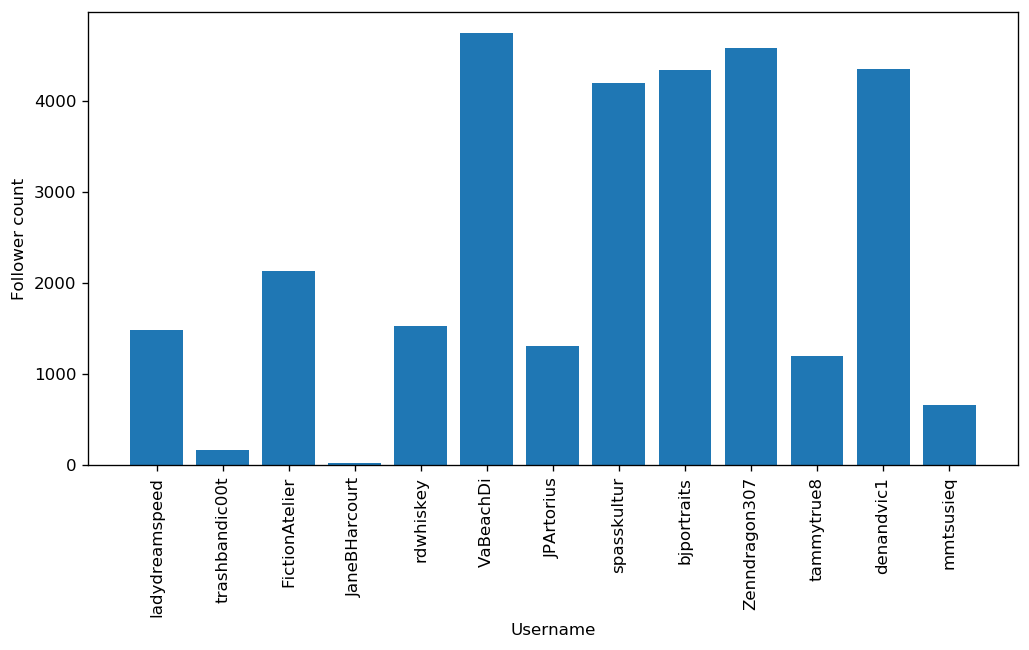

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5), dpi=120)


plt.bar(range(len(demdeb_mar_tl_new.index)), demdeb_mar_tl_new["follower count"])

plt.xticks(range(len(demdeb_mar_tl_new.index)), demdeb_mar_tl_new.username, rotation=90)
plt.ylabel("Follower count")
plt.xlabel("Username")

**Exercise 11. Understanding influence.** Now that you know who is most influential among your accounts, try to see if the data you get from Twitter allows you to explore what might explain that influence. Look into your data and plot the follower count against another variable. Is there a pattern?

**THERE IS ALWAYS MORE.** If you got all the way through this exercise and are still hungry for more, here are some suggestions for other things you could do:

1. To get an even better sense of what your accounts tweet about than just using hashtags, you could count the most used words. Create a list that, for each account has a dictionary of the frequency of each word with stop words removed. Remember, you can reuse your code from W3D1. You can get a list of stop words from [here](http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words). These are also stored in `stop_words.txt`. Add a column to your dataframe for most used words. 
2. Extract the number of favorites and retweets from the timelines you gathered. Is there any relationship between the number of followers and these figures? How about between these figures and the number of friends?
3. Researchers often use Twitter because we can do respondent-driven sampling, i.e. we start with a few accounts and then collect the accounts that follow these accounts to get a broader picture of the network. Start exploring the networks of the accounts you collected using the [`followers`](https://tweepy.readthedocs.io/en/latest/api.html#API.followers) command.
4. Given that the accounts you collected are similar in that they tweet about your topic of choice, it might be interesting know if there are issues that distinguish the accounts. Researchers often use term frequency-inverse document frequency to study such differences. [Here](https://www.freecodecamp.org/news/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3/) is a primer on the concept and a tutorial on how to implement it in Python. Can you find distinguishes your accounts from one another?